In [14]:
import time
import subprocess
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:


# List of Python files to execute
python_files = [ "sph.py", "memory_view.py", "sph_optimized.py", "dask_array.py", "delayed_dask.py", "futures_dask.py"] 

# Store execution times
execution_times = {}

for py_file in python_files:
    print(f"Started execution of {py_file}")
    start_time = time.time()  # Start timing
    subprocess.run(["python", py_file])  # Execute the script
    end_time = time.time()  # End timing

    execution_times[py_file] = end_time - start_time
    print(f"{py_file} executed in {execution_times[py_file]:.2f} seconds")

# Convert execution times to a DataFrame
df = pd.DataFrame(list(execution_times.items()), columns=["Python File", "Execution Time (seconds)"])
display(df)

# Plot the execution times
plt.figure(figsize=(8, 5))
plt.bar(df["Python File"], df["Execution Time (seconds)"], color='blue')
plt.xlabel("Python Files")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time of Different Python Files")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

,Python File,Execution Time (seconds)
0,sph.py,1312.68
1,memory_view.py,1245.06
2,sph_optimized.py,765.27
3,dask_array.py,1498.37
4,delayed_dask.py,1829.28
5,futures_dask.py,2453.79


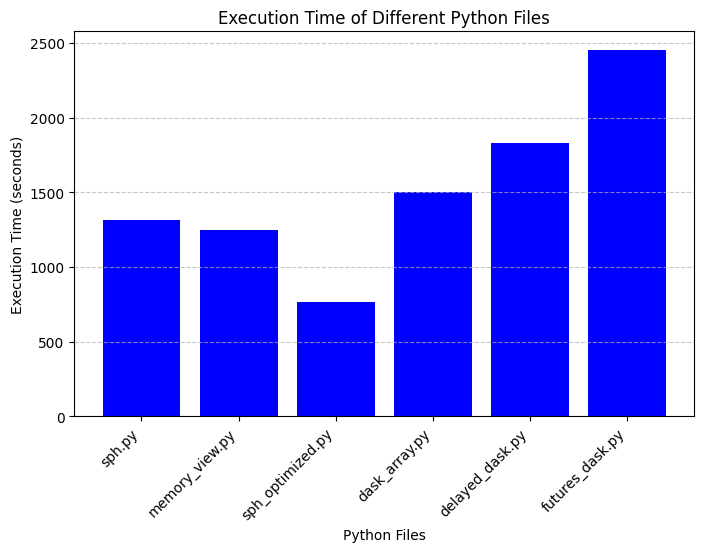

In [16]:
python_files = ["sph.py", "memory_view.py", "sph_optimized.py", "dask_array.py", "delayed_dask.py", "futures_dask.py"]

# Store execution times
execution_times = [1312.68, 1245.06, 765.27, 1498.37, 1829.28, 2453.79]
df = pd.DataFrame(list(zip(python_files, execution_times)), columns=["Python File", "Execution Time (seconds)"])
display(df)

# Plot the execution times
plt.figure(figsize=(8, 5))
plt.bar(df["Python File"], df["Execution Time (seconds)"], color='blue')
plt.xlabel("Python Files")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time of Different Python Files")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

Started execution of sph.py
sph.py executed in 1312.68 seconds
Started execution of data_structures.py
data_structures.py executed in 1245.06 seconds
Started execution of sph_optimized.py
sph_optimized.py executed in 765.27 seconds
Started execution of dask_array.py
dask_array.py executed in 1922.78 seconds
Started execution of dask_array_v2.py
dask_array_v2.py executed in 1498.37 seconds
Started execution of delayed_dask.py
delayed_dask.py executed in 1829.28 seconds
Started execution of futures_dask.py
Dask dashboard available at: http://127.0.0.1:8790/status
futures_dask.py executed in 2453.79 seconds

In [5]:
! python -m kernprof -l sph.py 

Wrote profile results to sph.py.lprof
Inspect results with:
python -m line_profiler -rmt "sph.py.lprof"


In [6]:
! python -m line_profiler -rmt "sph.py.lprof"

Timer unit: 1e-06 s

Total time: 1373.41 s
File: sph.py
Function: getAcc at line 110

Line #      Hits         Time  Per Hit   % Time  Line Contents
   110                                           @profile
   111                                           def getAcc( pos, vel, m, h, k, n, lmbda, nu ):
   112                                           	"""
   113                                           	Calculate the acceleration on each SPH particle
   114                                           	pos   is an N x 3 matrix of positions
   115                                           	vel   is an N x 3 matrix of velocities
   116                                           	m     is the particle mass
   117                                           	h     is the smoothing length
   118                                           	k     equation of state constant
   119                                           	n     polytropic index
   120                                           	lmbda

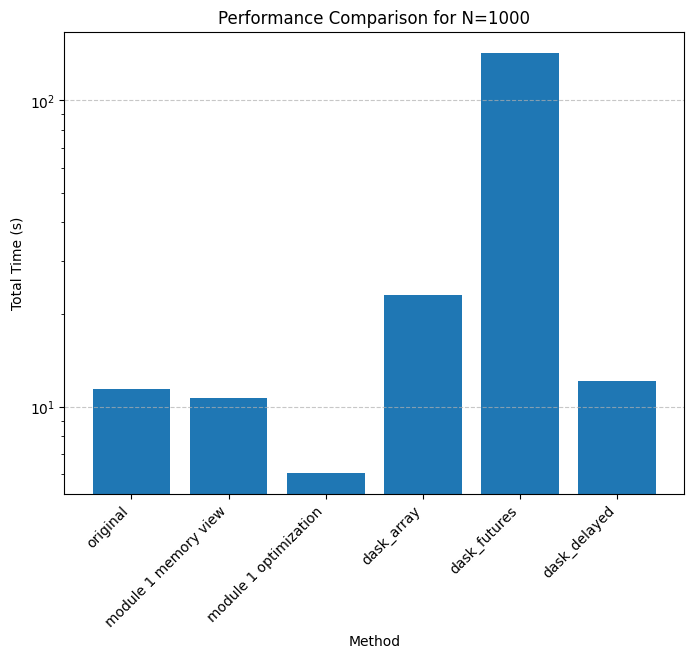

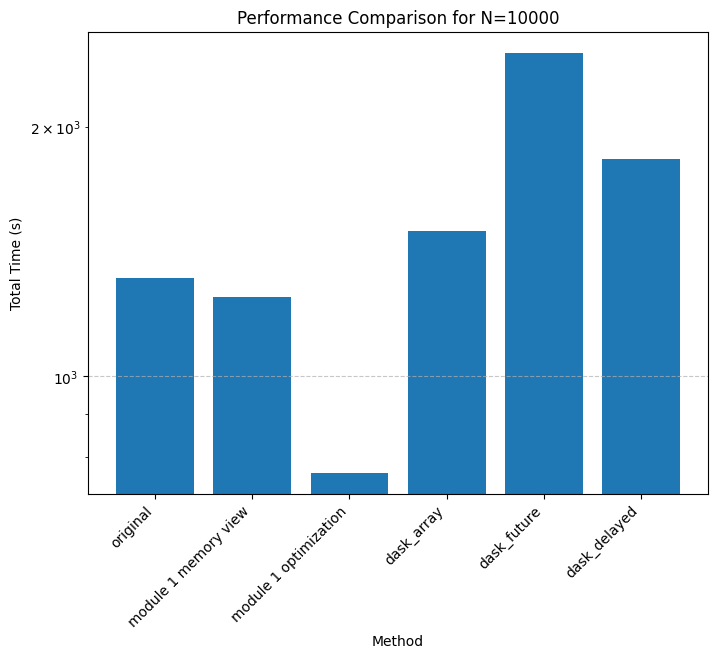

In [ ]:
import matplotlib.pyplot as plt

# Data
data = {
    1000: {
        "original": 11.37,
        "module 1 memory_view": 10.69,
        "module 1 optimization": 6.07,
        "dask_array": 23.16,
        "dask_futures": 143.11,
        "dask_delayed": 12.10,
    },
    10000: {
        "original": 1312.68,
        "module 1 memory_view": 1245.06,
        "module 1 optimization": 765.27,
        "dask_array": 1498.37,
        "dask_future": 2453.79,
        "dask_delayed": 1829.28,
    },
}

# Plot each N separately
for N, times in data.items():
    plt.figure(figsize=(8, 6))
    plt.bar(times.keys(), times.values())
    plt.xlabel("Method")
    plt.ylabel("Total Time (s)")
    plt.title(f"Performance Comparison for N={N}")
    plt.xticks(rotation=45, ha="right")
    plt.yscale("log")  # Using log scale to handle large disparities in values
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

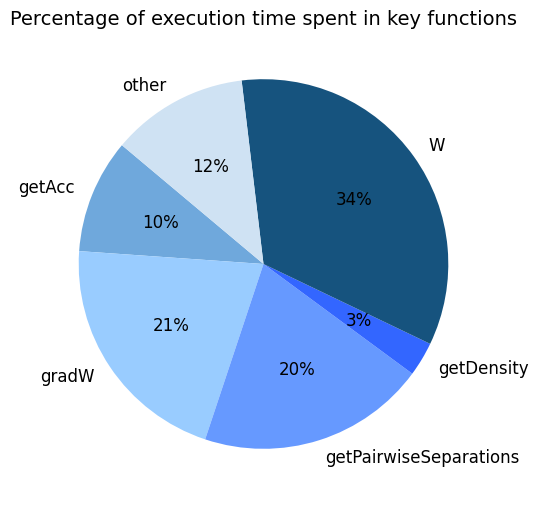

In [11]:
import matplotlib.pyplot as plt

# Data from the table
methods = ["getAcc", "gradW", "getPairwiseSeparations", "getDensity", "W", "other"]
percentages = [10, 21, 20, 3, 34, 12]

colors = ["#6fa8dc", "#99ccff", "#6699ff", "#3366ff", "#16537e", "#cfe2f3"]

# Create Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=methods, autopct='%1.0f%%', colors=colors, startangle=140, textprops={'fontsize': 12})
plt.title("Percentage of execution time spent in key functions", fontsize=14)
plt.show()